# Import Library

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 8, 5

# Generate Sin(x)

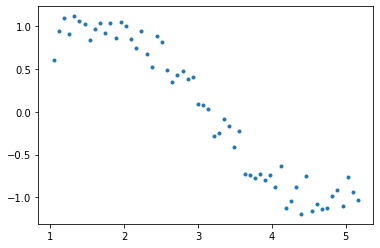

In [3]:
# define input array with angles from 60deg to 300deg converted to radians
X = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(100)  # Setting seed for reproducability
y = np.sin(X) + np.random.normal(0, 0.15, len(X))
X = X.reshape(60, -1)
# y = y.reshape(60,-1)
data = pd.DataFrame(np.column_stack([X, y]), columns=['X', 'y'])
plt.plot(data['X'], data['y'], '.')

In [4]:
from sklearn.svm import SVR


def example_svm_regression(X, y, plot_dict, kernel, C=1):

    for params in plot_dict:
        # define estimator object
        kernel_dict = {
            'linear': SVR(kernel='linear', C=params),
            'poly': SVR(kernel='poly', C=C, degree=params),
            'rbf': SVR(kernel='rbf', C=C, gamma=params)
        }

        # fit the model
        if kernel in kernel_dict:
            model = kernel_dict[kernel]
            model.fit(X, y)
            y_pred = model.predict(X)
            mae = mean_absolute_error(y_pred, y)

        # check if a plot is to be made for the entered power
        plt.subplot(plot_dict[params])
        plt.tight_layout()
        plt.plot(X, y, '.')
        plt.plot(X, y_pred)
        if kernel == 'linear':
            plt.title('Plot for C: %.2f' % params + '\n' + 'mae:%.2f' % mae)
        elif kernel == 'poly':
            plt.title('Plot for degree: %.2f' % params + '\n' +
                      'mae:%.2f' % mae)
        elif kernel == 'rbf':
            plt.title('Plot for gamma: %.2f' % params + '\n' +
                      'mae:%.2f' % mae)

# Linear SVR 

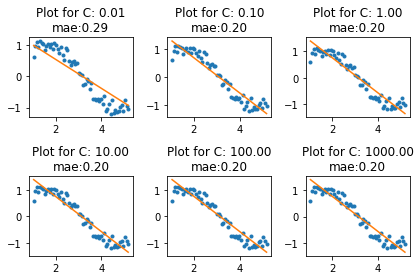

In [5]:
# 觀察C值的變化對預測結果的影響 （黃色線為預測結果）
plot_dict = {0.01: 231, 0.1: 232, 1: 233, 10: 234, 100: 235, 1000: 236}
example_svm_regression(X, y, plot_dict, kernel='linear')

# Polynominal SVR

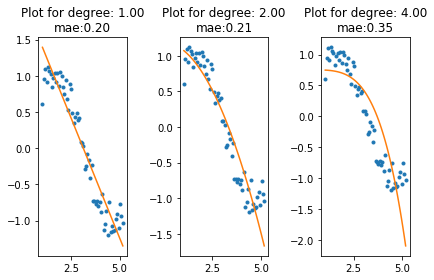

In [6]:
# 觀察degree值的變化對預測結果的影響 （黃色線為預測結果）
plot_dict = {1: 131, 2: 132, 4: 133}
example_svm_regression(X, y, plot_dict, kernel='poly')

# RBF SVR

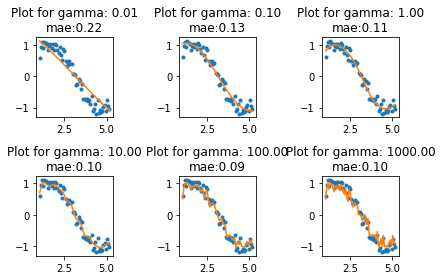

In [7]:
# 觀察gamma值的變化對預測結果的影響 （黃色線為預測結果）
plot_dict = {0.01: 231, 0.1: 232, 1: 233, 10: 234, 100: 235, 1000: 236}
example_svm_regression(X, y, plot_dict, kernel='rbf')